In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import math

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data  = pd.read_csv('INFY.NS.csv')

In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6.487000e+03
mean,315.959501,319.722653,312.134399,315.928990,275.373725,1.529716e+07
std,317.395127,320.568211,314.366051,317.494593,311.783465,1.616161e+07
min,0.763183,0.765625,0.712890,0.763183,0.526380,0.000000e+00
25%,69.492970,70.921875,68.063671,69.482033,49.189633,6.036795e+06
50%,237.500000,241.587494,233.206253,238.268753,179.381546,9.594120e+06
75%,473.500000,479.237503,470.049988,474.728119,414.672867,1.821839e+07
max,1814.000000,1834.500000,1782.300049,1822.150024,1822.150024,2.766150e+08


In [5]:
print(data.isnull().sum())


Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64


In [6]:
imputer = SimpleImputer(strategy='mean')
data[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(data[['Open', 'High', 'Low', 'Volume']])
data[['Close', 'Adj Close']] = imputer.fit_transform(data[['Close', 'Adj Close']])


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '2017-09-29'),
  Text(0.0, 0, '1996-01-01'),
  Text(1000.0, 0, '1999-11-01'),
  Text(2000.0, 0, '2003-09-01'),
  Text(3000.0, 0, '2007-08-14'),
  Text(4000.0, 0, '2011-08-30'),
  Text(5000.0, 0, '2015-09-15'),
  Text(6000.0, 0, '2019-10-15'),
  Text(7000.0, 0, '')])

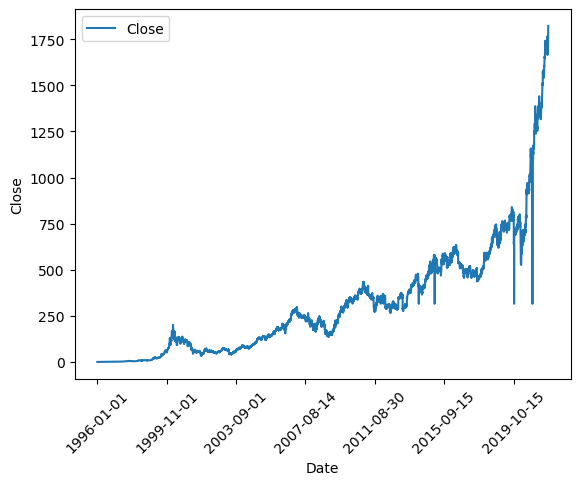

In [7]:
data.plot(x='Date', y='Close')
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation = 45)

In [8]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '2017-09-29'),
  Text(0.0, 0, '1996-01-01'),
  Text(1000.0, 0, '1999-11-01'),
  Text(2000.0, 0, '2003-09-01'),
  Text(3000.0, 0, '2007-08-14'),
  Text(4000.0, 0, '2011-08-30'),
  Text(5000.0, 0, '2015-09-15'),
  Text(6000.0, 0, '2019-10-15'),
  Text(7000.0, 0, '')])

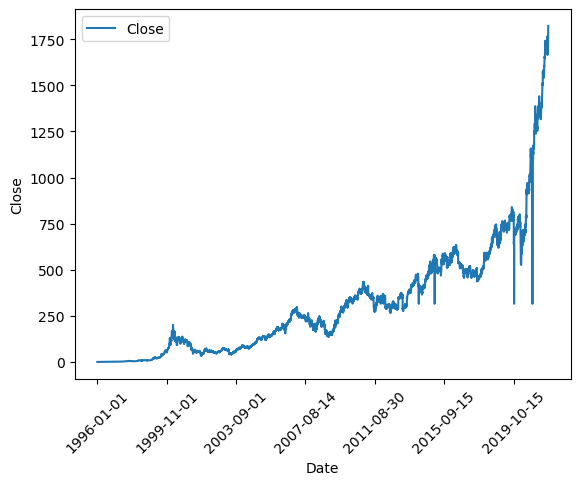

In [9]:
data.plot(x='Date', y='Close')
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation = 45)

In [10]:
X = data[['Open','High','Low','Volume']].values
y = data['Close'].values

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)

In [13]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

In [14]:
svr.predict(X)

array([333.97443351, 333.97443351, 333.97443351, ..., 333.97443351,
       333.97443351, 333.97443351])

In [15]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
correlation = np.corrcoef(y_test, y_pred)[0, 1]
mean_actual = np.mean(y_test)
mean_predicted = np.mean(y_pred)



print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"r2_score:{r2_score(y_test,y_pred)}")
print(f"Correlation between Actual and Predicted: {correlation}")
print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

MSE: 34496.87425763054
MAE: 48.72916205656576
RMSE: 185.73334180386283
r2_score:0.6502179681004768
Correlation between Actual and Predicted: 0.830994162513166
Mean of Actual Values: 316.4128137553051
Mean of Predicted Values: 278.8939970151093


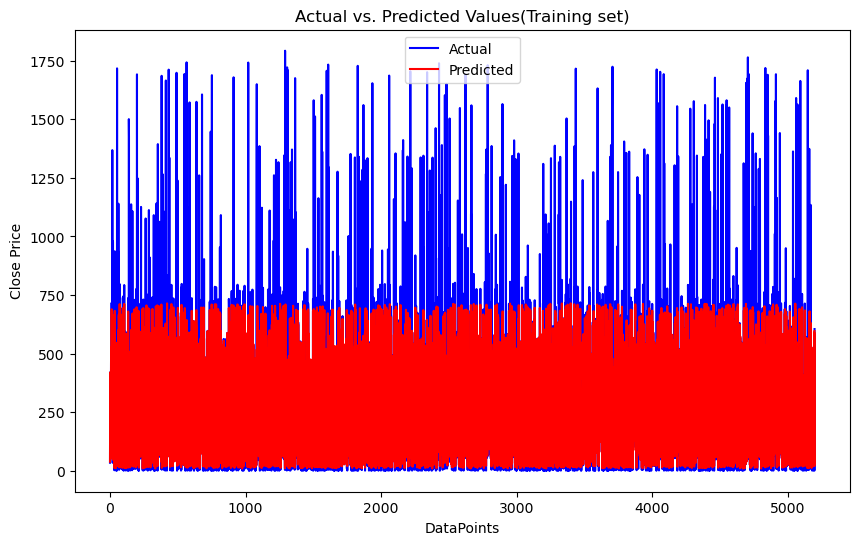

In [18]:
import numpy as np
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(np.arange(len(y_train)), y_train_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Values(Training set)')
plt.xlabel('DataPoints')
plt.ylabel('Close Price')
plt.legend()
plt.show()

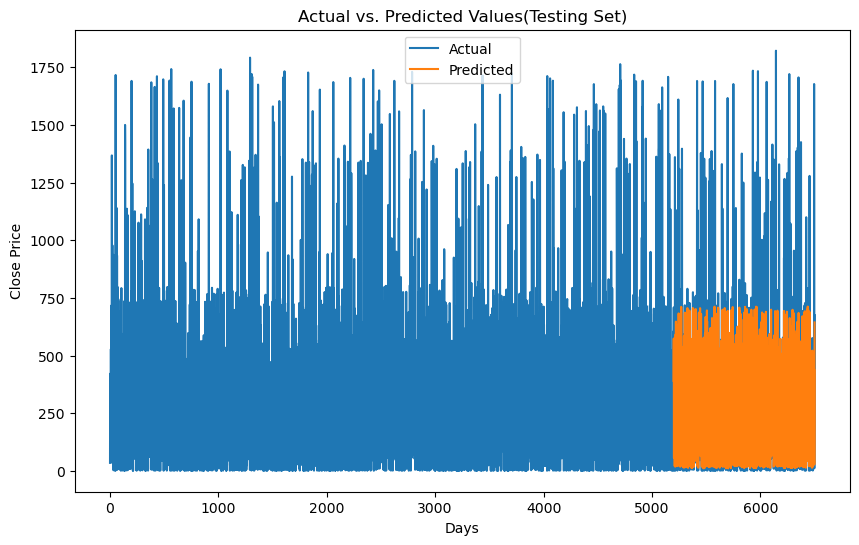

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([None for _ in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.title('Actual vs. Predicted Values(Testing Set)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


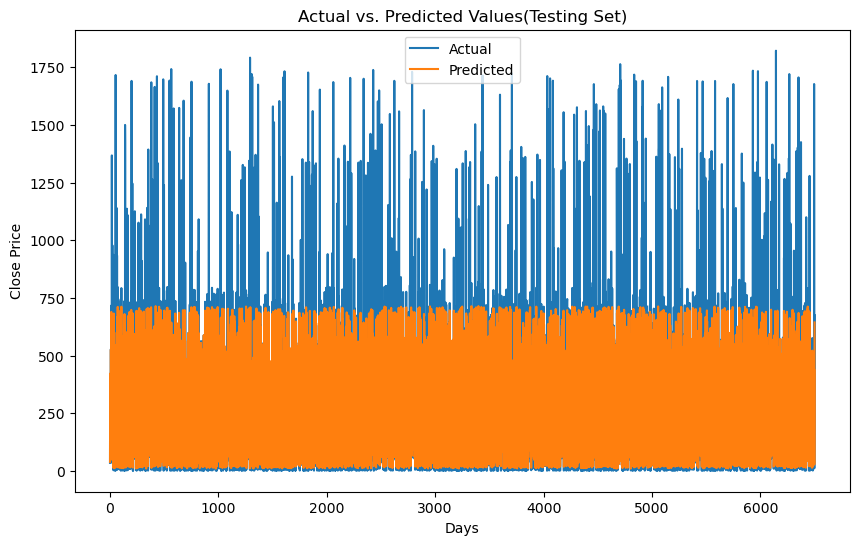

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([x for x in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.title('Actual vs. Predicted Values(Testing Set)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


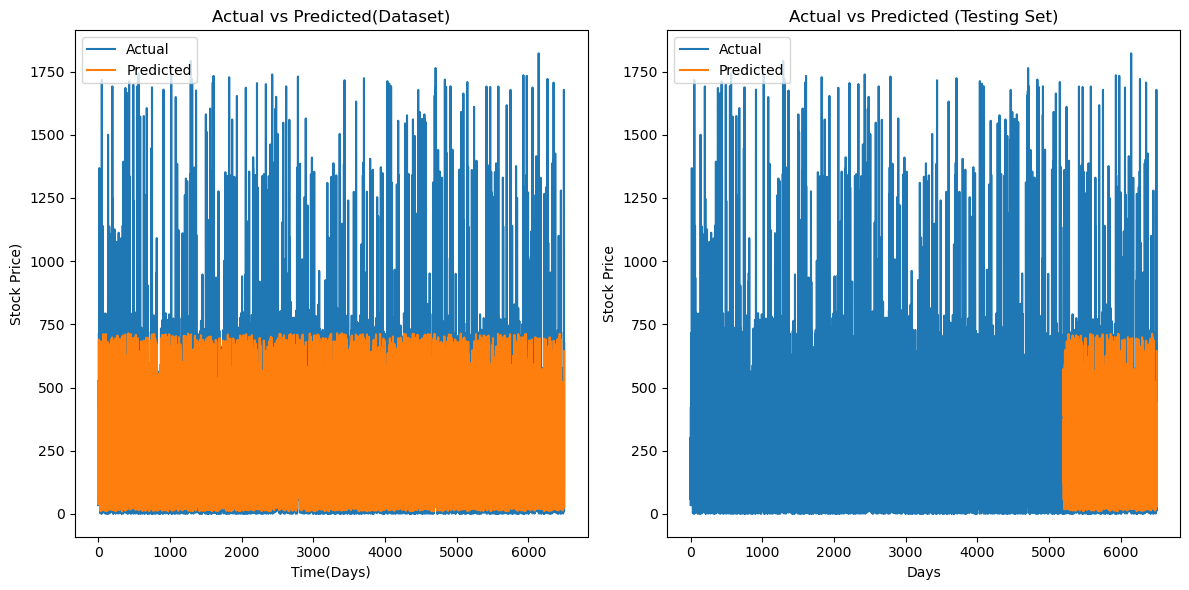

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([x for x in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.xlabel("Time(Days)")
plt.ylabel("Stock Price)")
plt.title(r"Actual vs Predicted(Dataset)")
plt.legend(loc='upper left')  # This will add the legend to your plots
# # plt.tight_layout()
# # plt.show()
# Plotting the actual vs predicted values for testing set
# plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([None for _ in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Days')
plt.ylabel('Stock Price')

plt.legend(loc='upper left')  # This will add the legend to your plots
plt.tight_layout()
plt.show()

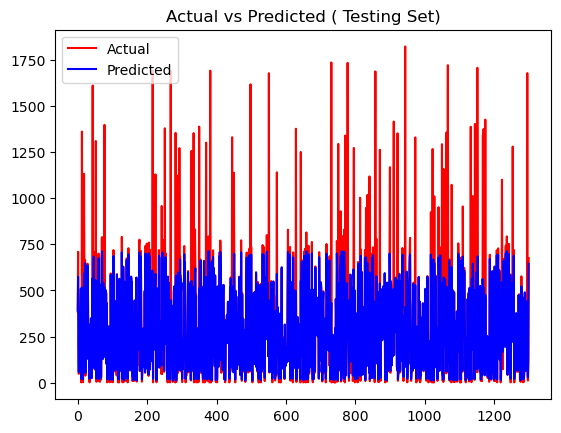

In [75]:

import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
fig, ax = plt.subplots()

# Plot the second graph
ax.plot(np.arange(len(y_test)), y_test, '-r', label='Actual')
# Plot the first graph
ax.plot(np.arange(len(y_pred)), y_pred, '-b', label='Predicted')
plt.title("Actual vs Predicted ( Testing Set)")
# Add a legend
ax.legend(loc='upper left')

# Show the plot
plt.show()


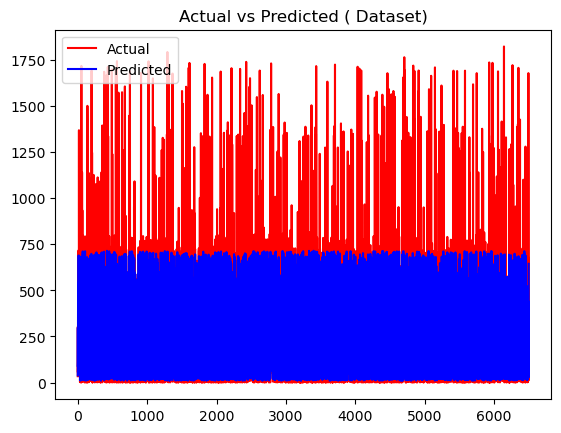

In [72]:

import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
fig, ax = plt.subplots()

# Plot the second graph
ax.plot(np.arange(len(y)), np.concatenate((y_train,y_test)), '-r', label='Actual')
# Plot the first graph
ax.plot(np.arange(len(y)), np.concatenate((y_train_pred,y_pred)), '-b', label='Predicted')
plt.title("Actual vs Predicted ( Dataset)")
# Add a legend
ax.legend(loc='upper left')

# Show the plot
plt.show()


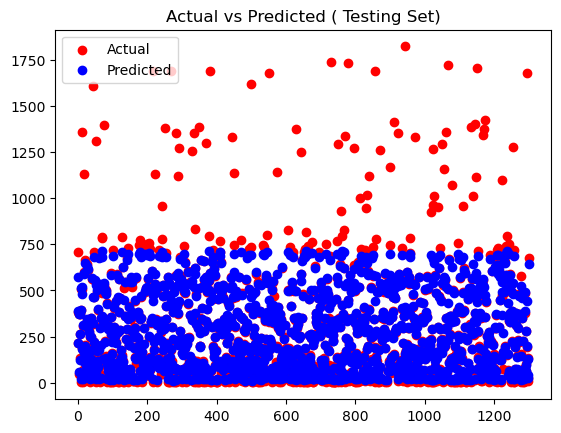

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
fig, ax = plt.subplots()

# Scatter plot for the actual data
ax.scatter(np.arange(len(y_test)), y_test, color='r', label='Actual')
# Scatter plot for the predicted data
ax.scatter(np.arange(len(y_pred)), y_pred, color='b', label='Predicted')

plt.title("Actual vs Predicted ( Testing Set)")

# Add a legend
ax.legend(loc='upper left')

# Show the plot
plt.show()
